<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [4]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [5]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [6]:
import pandas as pd
import numpy as np
import spacy

df = yelp 

nlp = spacy.load("en_core_web_lg")

lemmas = []

for doc in nlp.pipe(df['text']):
    
    d_lems = []
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) :
            d_lems.append(token.lemma_)
    lemmas.append(d_lems)
    
df['tokens'] = lemmas

In [7]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, step, foot, Circus, Circu..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, good, actual..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3.5, 4, star, \n\n, bad, price, $, 12.99, lun..."


In [8]:
# Vizualize the most common words
from collections import Counter

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    
    wc['total_pct'] =  wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cum_pct_total'] = wc['total_pct'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc , on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

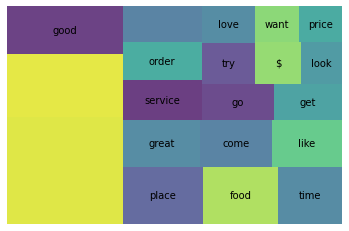

In [9]:
import squarify
import matplotlib.pyplot as plt

wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['total_pct'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [10]:
# Initiating stop words
STOP_WORDS = nlp.Defaults.stop_words.union([" ", "  ", "   ", "$"])

In [11]:
lemmas = []

for doc in nlp.pipe(df['text']):
    
    d_lems = []
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.text.lower() not in STOP_WORDS)) :
            d_lems.append(token.lemma_)
    lemmas.append(d_lems)
    
df['tokens'] = lemmas

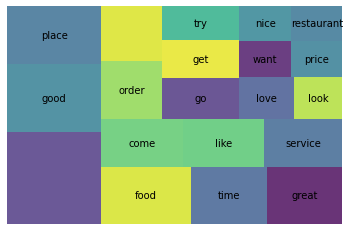

In [12]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['total_pct'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [13]:
def tokenize(doc):
    
    doc = nlp(doc)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop == False) and (token.is_punct == False) and (token.text.lower() not in STOP_WORDS)]

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.95, min_df=2, max_features=5000, tokenizer=tokenize)

dtm = tfidf.fit_transform(df['text'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm

,,,+,1,2,3,4,5,ambiance,arrive,...,yummy,yummy,zero,zero star,zone,zoo,zucchini,~,à,était
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.199880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.047993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [16]:
text_1 = ['it was the best pizzas I have had in a while, mashroom pizza and their tiramisu is a must have']

In [17]:
new = tfidf.transform(text_1)

In [18]:
nn.kneighbors(new.todense())

(array([[0.79290986, 0.91131787, 0.95014988, 0.96941477, 1.        ,
         1.02123359, 1.03688422, 1.04400347, 1.04553187, 1.05604589]]),
 array([[8348, 6238, 2315, 5582, 6311, 3618, 8877, 9571, 5662, 8284]]))

In [19]:
df['text'][8348]

"This is honestly the best pizza IN THE WORLD. I've traveled Europe this summer. Had pizza in Italy it honestly was not as good as this pizza. Even the pizza in NYC was not as good. This is the best pizza out there."

In [20]:
df['text'][6238]

'Best pizza in Ahwatukee! Family owned. Great service.'

In [21]:
df['text'][2315]

"Best pizza in town two slices and a soda for a dollar if you can't beat that right next to the AT&T store pay your bill get your grub on best pizza and they deliver"

In [22]:
df['text'][5582]

"I seriously don't understand what is all the hype about this place. I love my thin crust pizza, but I actually love it with good flavourful toppings and UNBURN crust, which Libretto can't seems to be able to execute. First time I was there, I ordered the duck confit pizza, which was so dry, tasteless and the crust and dough was burned. I figure that maybe is was just that pizza, so I gave it another chance and came back on a different occasion. Ordered the simplest pizza possible, the margarita, which was equally as disappointing as my first visit. Pizza was lacking flavour and again, the dough and crust was burned. Also gave them another chance to redeem themselves that night and ordered a tiramisu. It came in a cute bottle jar, which was a little to deep to spoon out an equal amount of layer of the tiramisu, forcing myself to eat only the creamy part alone, and leave the inedible rum soaked whatever at the bottom. Sorry, I've really tried to like you, but Terroni is hands down the b

In [23]:
df['text'][5662]

"As a native of New Jersey, I found it extremely difficult to find a great pizza place when I moved to Vegas over 20 years ago.  I can say this no longer, Frankie's Pizza is by far the best pizza place in town.  Eggplant pizza and the Buffalo chicken pizza are fabulous....   Eating there brought back the memories of back East.  THANK YOU FRANKIE AND FAMILY."

In [24]:
df['text'][8284]

"Vinny's pizza is good.  I would definitely say it's better then most in the Champaign-Urbana area, especially if you are looking for a New York Style pizza.  They always seem to be offering great deals as well.  The staff is always super attentive to make sure you are getting the best deal possible as well.  I went in once to order a large pizza to go, and the staff said that on this particular day, we could get an extra large pizza for the same price.  Score.  Another day we were able to score two large pizzas for the price of one.  It seems Vinny's holds really awesome deals like this on every day of the week (A different deal each day) so it's definitely worth checking out just because of some of the awesome deals they have on food.\n\nI will definitely be eating here again.  It may not be extremely good pizza, but its good pizza and definitely makes my stomach happy."

In [25]:
# They are all about pizza, some about tiramisu and most of them are positive reviews 

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [26]:
# Define Pipeline Components

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#vect = tfidf- Started using tfidf from last part as but it was taking alot of time so switched to a simpler vectrorizer. 
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])

In [27]:
# Define Search Space with hyperparameters of the vectorizer and the classification model.
# We have to do a train test split in a normal situation but this time we train on df and test on our fake review in the interest of time. 
parameters = {
    'vect__max_df': (0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators': (5,10),
    'clf__max_depth':(5,10)
}

grid_search = GridSearchCV(pipe,parameters, cv=2, n_jobs=4, verbose=1)
grid_search.fit(df['text'], df['stars'])

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   22.8s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:   32.5s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [28]:
# Getting the best score 
grid_search.best_score_

0.5136000000000001

In [29]:
grid_search.predict(['it was the best pizzas I have had in a while, mashroom pizza and their tiramisu is a must have', '5'])

array([5, 5])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [30]:
import gensim
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

In [31]:
def doc_stream(path):
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            if f[-3:] == 'txt':
                with open(os.path.join(path,f)) as t:
                    text = t.read().strip('\n')
                    tokens = tokenize(text)
                yield tokens

Learn the vocubalary of the yelp data:

In [32]:
id2word = corpora.Dictionary(df['tokens'])
len(id2word)

28368

In [33]:
# Sliiming the size down for faster processing
id2word.filter_extremes(no_below=5, no_above=.98)
len(id2word)

6473

Create a bag of words representation of the entire corpus

In [34]:
corpus = [id2word.doc2bow(d) for d in df['tokens']]

In [35]:
model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=4, passes=5)

In [36]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

In [37]:
topics = [' '.join(t[0:5]) for t in words]

In [38]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
time place go 

 tell

------ Topic 1 ------
great good place service recommend

------ Topic 2 ------


 nail like dog look

------ Topic 3 ------


 room time get come

------ Topic 4 ------
good place food great 



------ Topic 5 ------


 good place great time

------ Topic 6 ------


 food good place order

------ Topic 7 ------


 order 
 like good

------ Topic 8 ------
good service food great order

------ Topic 9 ------
food time 

 good come



Create 1-2 visualizations of the results

In [39]:
distro = [model[d] for d in corpus]
num_topics = 20

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [40]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.104201  0.000038       1        1  29.374794
0      0.076599  0.012341       2        1  16.148041
3      0.145852  0.049724       3        1   9.579683
7     -0.054714  0.002987       4        1   9.543720
9     -0.005770  0.007134       5        1   8.829446
5      0.033112  0.006526       6        1   8.185733
4     -0.056254 -0.011300       7        1   5.207271
1      0.032471  0.017806       8        1   4.942710
8     -0.107588  0.040295       9        1   4.889633
2      0.040492 -0.125552      10        1   3.298967, topic_info=      Term         Freq        Total Category  logprob  loglift
39    good  6208.000000  6208.000000  Default  30.0000  30.0000
191  great  4213.000000  4213.000000  Default  29.0000  29.0000
135   food  4923.000000  4923.000000  Default  28.0000  28.0000
48    \n\n  8425.000000  8425.000000  Default  27.0000  27.0000
120  place  5317.000000  5317.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
851    new    53.797306  1095.347534  Topic10  -5.6562   0.3980
135   food    66.328773  4923.109863  Topic10  -5.4468  -0.8955
551  drink    54.021412  1421.343994  Topic10  -5.6521   0.1416
322   find    54.303223  1585.229004  Topic10  -5.6468   0.0377
191  great    56.409554  4213.708496  Topic10  -5.6088  -0.9019

[865 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
293       1  0.290032        \n
293       2  0.243262        \n
293       3  0.056186        \n
293       4  0.173893        \n
293       5  0.090713        \n
...     ...       ...       ...
1589      1  0.900186  zucchini
1589      7  0.032149  zucchini
2762      2  0.017980         à
2762      3  0.952948         à
6080      3  0.886331     était

[3023 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 4, 8, 10, 6, 5, 2, 9, 3])

In [41]:
topics = pd.DataFrame.from_records(new_distro)
topics.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.979975,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.930744,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.0,0.0,0.531143,0.0,0.125876,0.000000,0.0,0.000000,0.334541,0,0,0,0,0,0,0,0,0,0
3,0.952595,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.0,0.0,0.000000,0.0,0.100456,0.777611,0.0,0.108195,0.000000,0,0,0,0,0,0,0,0,0,0


In [42]:
df['primaryTopic'] = topics.idxmax(axis=1)

In [43]:
df[['primaryTopic', 'stars']].groupby('primaryTopic').mean()

,stars
primaryTopic,
0,2.434962
1,4.588721
2,4.018605
3,3.357673
4,4.339879
5,4.188034
6,3.922255
7,3.675926
8,3.955994


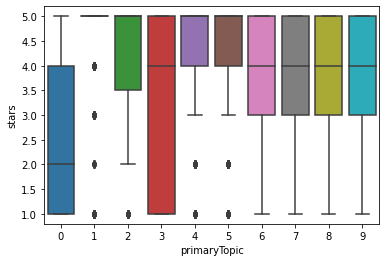

In [44]:
import seaborn as sns

ax = sns.boxplot(x="primaryTopic", y="stars", data=df)

## pyLDAvis 
From this vizualization we can interpret what each topic is mostly about and if topic overlap in using key terms, size of each circle indicates the distribution of key words in that topic in whole dataset. For start let's look at topics with no overlap in key terms. Topic 10 and Topic 3 have no overlaps with anyother topics, by covering our LDA topic analysis from last part, we can interpret topic 10 is mostly about "Good time", "Good food", by selecting topic 10 on pyLDAvis we can see fequency of the words use within topic 3 and by covering them it's safe to interpret that its either a topic about a nail salon with a good service or a ramen resturant with good service. We can get better results by improving our model to analyze this topic using a more accrurate key word frequency. Topic 3 seems to be about a hotel nice staff , nice rooms, and clients having nice time since "nice", "rooms" and "time" are among the words with most frequency. 


## Boxplot
We can interpret the majority of star ratings among each topic. Going back to topic 3 and topic 10 we can interpret most of the star ratings for topic 3 (nail salon or a ramen restaurant) are among 3.5 to 5 stars which indicates a decent service quality. As far as topic 10 we can interpret most of the star ratings are above 3 with an average of 4 star reviews which 

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)